## Practical Activity 3.2.8

### Prepare your workstation

In [2]:
# Copy the YAML file and your Twitter keys over to this Jupyter Notebook before you start to work
!pip install pyyaml
import yaml
from yaml.loader import SafeLoader
!pip install twitter
from twitter import *

# Import the yaml file - remember to specify the whole path and use / between directories
twitter_creds = yaml.safe_load(open('Twitter.yaml', 'r').read())

# Pass your twitter credentials
twitter_api = Twitter(auth = OAuth(twitter_creds['access_token'],
                                  twitter_creds['access_token_secret'],
                                  twitter_creds['api_key'],
                                  twitter_creds['api_secret_key']))

# See if you are connected
print(twitter_api)

In [3]:
# Run a test with #python
python_tweets = twitter_api.search.tweets(q="#python")

# View output
print(python_tweets)

{'statuses': [{'created_at': 'Wed Jun 01 13:58:50 +0000 2022', 'id': 1531998710720233474, 'id_str': '1531998710720233474', 'text': 'RT @Biocube_AI: What are the🔝🔟#Applications of #AI in #DigitalMarketing?\n\n#MachineLearning #DataScience #BigData #Analytics #innovation #di…', 'truncated': False, 'entities': {'hashtags': [{'text': 'Applications', 'indices': [30, 43]}, {'text': 'AI', 'indices': [47, 50]}, {'text': 'DigitalMarketing', 'indices': [54, 71]}, {'text': 'MachineLearning', 'indices': [74, 90]}, {'text': 'DataScience', 'indices': [91, 103]}, {'text': 'BigData', 'indices': [104, 112]}, {'text': 'Analytics', 'indices': [113, 123]}, {'text': 'innovation', 'indices': [124, 135]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Biocube_AI', 'name': 'BIOCUBE TECHNOLOGIES', 'id': 1423663397585920005, 'id_str': '1423663397585920005', 'indices': [3, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://github.com/lina2497" re

### 1. Test connection

In [8]:
# Query the term cheesecake
q = {'q':'cheesecake', 'count':100, 'result_type':'recent'}
results = []

while len(results) < 30:
    query = twitter_api.search.tweets(**q)
    q['max_id'] = query['search_metadata']['next_results'].split('&')[0].split('?max_id=')[1]
    results.append(query)
    
# Determine the number of results
len(results)    

30

### 2. Create DataFrames

In [10]:
# Import Pandas to join the DataFrames.
import pandas as pd

# Concat DataFrames.
results_list_pd = pd.concat([pd.DataFrame(_['statuses'])for _ in results])

# View the output.
results_list_pd.shape

(2991, 30)

In [14]:
# Determine values of output.
results_list_values = results_list_pd['text'].values

results_list_values

array(['@jwwjjhloml_ strawberry cheesecake 🥺 asan yung kiss ko pla',
       '@afiq_ja surely nothing can go wrong with cheesecake hehe nanti klu dh try buat review ok !!',
       'Where was the cheesecake nearest besieger?', ...,
       "33. I don't indulge in dessert too often--more of a salty/savory than sweet most of the time (haha-HOW FUCKING APPR… https://t.co/JWuajOS4zh",
       'RT @reportalos: @AytoCancun @ServPublicosBj @SerPublicosBj calle luciérnaga smz 500. Así lucen nuestras hermosas calles de cancun con bache…',
       'some homemade vanilla ice and that double sided crust cheesecake would great rn 🥲'],
      dtype=object)

### 3. Investigate tweets

In [19]:
# Import necessary libraries.
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [16]:
# Look at one raw tweet.
results_list_values[1]

'@afiq_ja surely nothing can go wrong with cheesecake hehe nanti klu dh try buat review ok !!'

In [17]:
# Split up each tweet into individual words.
results_list_values_token = [word_tokenize(_) for _ in results_list_values]

In [20]:
# Extract a list of all english words.
all_english_words = set(words.words())

In [21]:
# Pre-process tweets:
# Get every word.
# Convert it to lowercase.
# Only include if the word is alphanumeric and if it is in the list 
# of English words.
results_list_values_token_nostop = \
[[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and \
y.lower() in all_english_words] for x in results_list_values_token]

In [22]:
# View output.
results_list_values_token_nostop[1]

['surely', 'nothing', 'go', 'wrong', 'cheesecake', 'try', 'review']

## Continue to work from below for sentiment analysis

## NLTK sentiment analysis 

### 1. Import NLTK

In [23]:
# Import the prebuilt rules and values of the 'vader lexicon'.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\richa\AppData\Roaming\nltk_data...


True

In [24]:
# Import the vader class and create an object of the analyser called darth_vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the SIA.
darth_vader = SentimentIntensityAnalyzer()

In [25]:
# Run through a dictionary comprehension to take every cleaned tweet.
# Next run the polarity score function on the string.
# This will return four values in a dictionary.
results_list_values_token_nostop_polarity = \
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in results_list_values_token_nostop}

### 2. Create a Pandas DataFrame

In [26]:
# Convert the list of dictionary results to a pandas dataframe.
polarity_pd = pd.DataFrame(results_list_values_token_nostop_polarity).T

In [27]:
# Get the top 5 most positive cleaned tweets related to cheesecake
polarity_pd.sort_values('pos', ascending = 0).head(5)

,neg,neu,pos,compound
yes u,0.0,0.0,1.0,0.4019
honestly,0.0,0.0,1.0,0.4588
better,0.0,0.0,1.0,0.4404
want fun,0.0,0.0,1.0,0.5574
love,0.0,0.0,1.0,0.6369


In [28]:
# Get the top 5 most negative words related to cheesecake
polarity_pd.sort_values('neg', ascending = 0).head(5)

,neg,neu,pos,compound
insane,1.000,0.000,0.0,-0.4019
fire,1.000,0.000,0.0,-0.3400
cry,1.000,0.000,0.0,-0.4767
victim abuse victim abuse amber,0.926,0.074,0.0,-0.9118
heartbroken crying ride,0.881,0.119,0.0,-0.8126


In [29]:
# Show the distribution of sentiment values.
polarity_pd['compound'].describe()

count    1295.000000
mean        0.142539
std         0.329356
min        -0.911800
25%         0.000000
50%         0.000000
75%         0.381800
max         0.961200
Name: compound, dtype: float64

### 3. Plot the output

In [30]:
# Import matplotlib for visualisation.
%matplotlib inline
import matplotlib.pyplot as plt

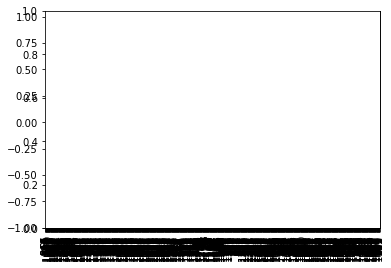

In [33]:
# Create barplot visualisation.
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind = 'bar')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

<AxesSubplot:>

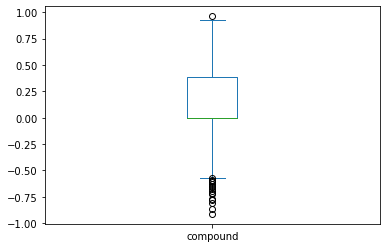

In [34]:
# Visualise outliers with a boxplot.
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind = 'box')